In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

from nltk.tokenize import word_tokenize 
import re
import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv("BBC News.csv")

In [43]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Understanding Features and Target Variables

In [44]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [45]:
data.shape

(1490, 3)

In [46]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for NULL values

In [47]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# Countplot of Target Variable(Category)

<AxesSubplot:xlabel='Category', ylabel='count'>

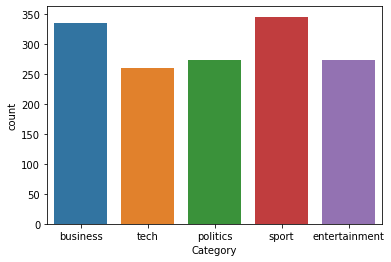

In [48]:
sns.countplot(data.Category)

In [49]:
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


# Distribution Plot

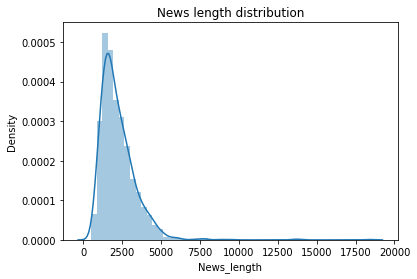

In [50]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [51]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

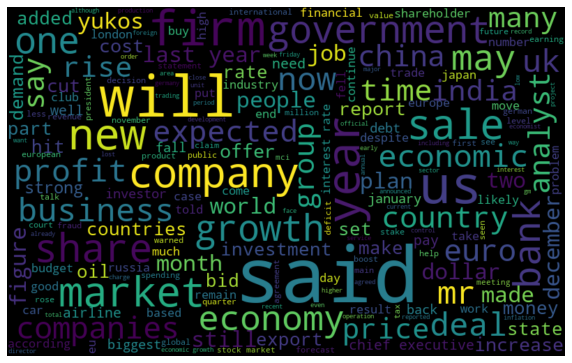

In [52]:
subset=data[data.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

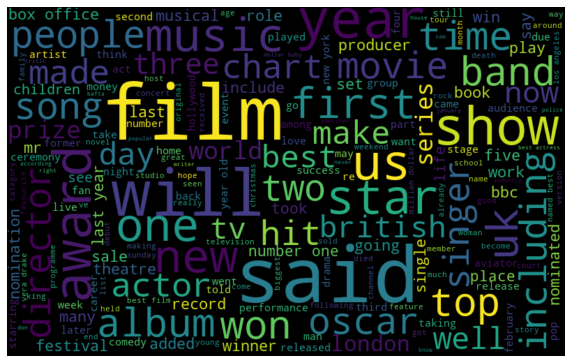

In [53]:
subset=data[data.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

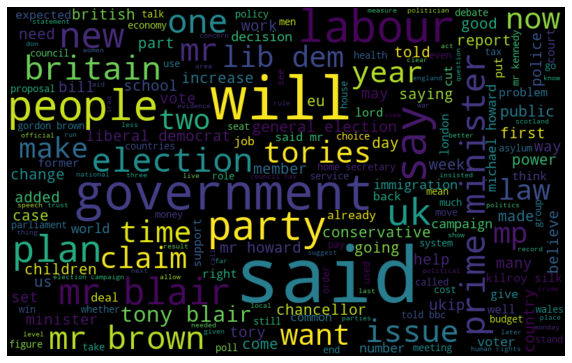

In [54]:
subset=data[data.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

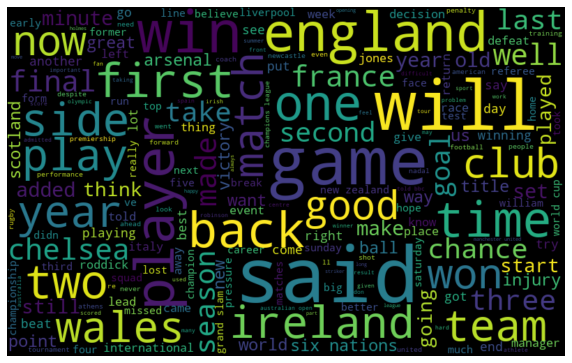

In [55]:
subset=data[data.Category=="sport"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

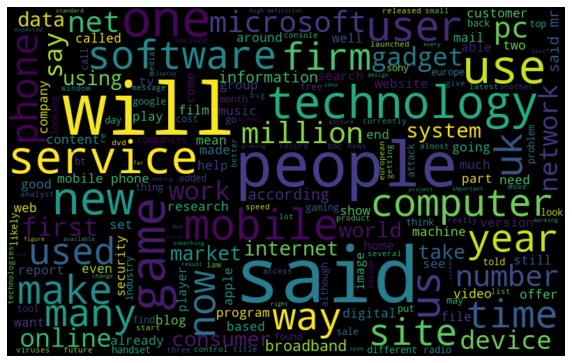

In [56]:
subset=data[data.Category=="tech"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [57]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [58]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [59]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [60]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category']) 

In [61]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [62]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [64]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [65]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05501963 0.         0.07169191 ... 0.03972773 0.08176571 0.07044504]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


In [66]:
features_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06663471, 0.1699869 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08809502, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07369283, 0.2337518 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05544694, 0.        ,
        0.        ],
       [0.        , 0.        , 0.15065227, ..., 0.14134942, 0.10148038,
        0.        ]])

# Building Models

# Logistic Regression

In [67]:
'''model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))'''

"model = LogisticRegression()\nprint(model.get_params())\nmodel.fit(features_train, labels_train)\nmodel_predictions = model.predict(features_test)\nprint('Accuracy: ', accuracy_score(labels_test, model_predictions))\nprint(classification_report(labels_test, model_predictions))"

# Hyper Parameter Tuning (Logistic Regression)

In [68]:
'''param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_'''

"param_grid = {'C': [0.1,0.001,1],\n    # Create a list of options for the regularization penalty\n    'penalty' : ['l1', 'l2'] }\nclf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)\n\nbestF = clf.fit(features_train, labels_train)\nbestF.best_params_"

In [69]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [70]:
import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'newsclassify.pkl') 



['newsclassify.pkl']

In [129]:
text="what high-definition will do to dvds first it was the humble home video  then it was the dvd  and now hollywood is preparing for the next revolution in home entertainment - high-definition.  high-definition gives incredible  3d-like pictures and surround sound. the dvd disks and the gear to play them will not be out for another year or so  and there at are still a number of issues to be sorted out. but when high-definition films do come out on the new format dvds  it will profoundly change home entertainment. for rick dean  director of business development for digital content company thx  a high-definition future is an exciting prospect. he has worked on the star wars dvd trilogy  finding nemo  the incredibles and indiana jones.  there was a time not so long ago when the film world and the video world were two completely separate worlds   he told the bbc news website.   the technology we are dealing with now means they are very much conjoined.  the film that we see in theatres is coming from the same digital file that we take the home video master   he says. but currently  putting a master feature film onto dvd requires severe compression because current dvd technology cannot hold as much as high-definition films demand.  as much as you compress the picture data rate wise  you also take qualities away from the picture that we fight so hard to keep in the master   he explains.  i would love to be able to show people what projects that we worked on really look like in the high-def world and i find it very exciting.   high-definition dvds can hold up to six times more data than the dvds we are used to. it will take time though to persuade people who spent money on dvd players to buy the different players and displays required to watch high-definition dvds in 18 months  time. mr dean is confident though:  i think if they see real hd [high-definition]  not some heavily compressed version of it  there is such a remarkable difference.  i have heard comments from people who say the images pop off the screen.   high-definition will mean some changes for those working behind the scenes too. on the whole  producing films for high-definition dvds will be easier in some ways because less compression is needed. equally  it may mean hollywood studios ask for more to be put onto the average dvd.  when we master movies right now  our data rates are running at about 1.2 gigabits per second   says mr dean.  our dvds that we put out today have to be squashed down to about five or six megabits per second.  that s a huge amount of compression that has to be applied - about 98%. so if you have anything that allows more space  you don t have to compress so hard.  studios could fit a lot more marketing material  games  and features  onto high-capacity dvds. currently  an entire dvd project can take up to three months  says mr dean. although the step of down-converting will be bypassed  this will realistically only save a day s work  says mr dean. one of the most time consuming elements is building dvd navigation and menu systems. on the fairly complex star wars disks  making sure the menu buttons worked took 45 human hours alone. if studios want to cash in on the extra space  it could mean extra human hours  for which someone has to pay.  if the decision on the studio side is that they are going to put a lot more on these disks  it could be more expensive because of all the extra navigation that is required.  and if studios do focus on delivering more  added value content   thinks mr dean  ultimately it could mean that they will want more money for it. those costs could filter down to the price ticket on a high-definition dvd. but if the consumer is not willing to pay a premium price  studios will listen  thinks mr dean.  high-definition throws up other challenge to film makers and dvd production alike. more clarity on screen means film makers have to make doubly sure that attention to detail is meticulous.  when we did the first hd version of star wars episode i  everybody was very sun-tanned  but that was make-up.  in the hd version of episode i  all these make-up lines showed up   explains mr dean. the restoration of the older star wars episodes revealed some interesting items too.   there are scans of a corridor [on the death star] and fairly plainly in one of those shots  there is a file cabinet stuck behind one of the doorways.  you never used to be able to see it because things are just blurred enough during the pan that you just didn t see it.  what high-definition revolution ultimately means is that the line between home entertainment and cinema worlds will blur. with home theatre systems turning living rooms into cinemas  this line blurs even further. it could also mean that how we get films  and in what format  will widen.  in the future we are going to look towards file delivery over ip [internet protocol - broadband]  giving a dvd-like experience from the set-top box to the hard drive   says mr dean. but that is some time off for most  and for now  people still like to show off something physical in their bookshelves."

In [130]:
pre_text= process_text(text)

In [131]:
pre_text

'highdefinition dvds first humble home video dvd hollywood preparing next revolution home entertainment highdefinition highdefinition gives incredible 3dlike pictures surround sound dvd disks gear play another year still number issues sorted highdefinition films come new format dvds profoundly change home entertainment rick dean director business development digital content company thx highdefinition future exciting prospect worked star wars dvd trilogy finding nemo incredibles indiana jones time long ago film world video world two completely separate worlds told bbc news website technology dealing means much conjoined film see theatres coming digital file take home video master says currently putting master feature film onto dvd requires severe compression current dvd technology hold much highdefinition films demand much compress picture data rate wise also take qualities away picture fight hard keep master explains would love able show people projects worked really look like highdef 

In [132]:

features_test_ = tfidf.transform([pre_text]).toarray()


In [133]:
 # Load the model from the file 
lr_from_joblib = joblib.load('newsclassify.pkl') 

# Use the loaded model to make predictions 
predict=lr_from_joblib.predict(features_test_) 


In [135]:
predict = predict[0]

4

In [137]:
if predict == 0:
    send ='Bussiness'
elif predict ==1:
    send ='Entertainment'
elif predict ==2:
    send ='politics'
elif predict== 4:
    send ='technology'
elif predict ==3:
    send ='sports'
    

In [138]:
send

'technology'